In [1]:
print("Hello")

Hello


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import libraries
!pip install ydata-profiling
import os
import math
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from ydata_profiling import ProfileReport  # For generating EDA reports
from IPython.display import IFrame  # For displaying the report in the notebook

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.7/395.7 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.0 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=625d076f681973a5c3f355fbeb0dd1654fb4683bdbc03f4e0e48af35a4ef8a94
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [5]:
# Verify the Installation

import numpy as np
import pandas as pd

print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)

numpy version: 2.0.2
pandas version: 2.2.2


In [6]:
# Path to folder in Google Drive
base_path = '/content/drive/MyDrive/CIND 820 - Capstone Project/'

# List all files in the folder
print(os.listdir(base_path))

['stores.csv', 'features.csv', 'test.csv', 'train.csv', 'Reports', 'walmart_sales_profiling_report_revised.html', 'Old', 'cleaned_walmart_data.csv', '1_Data preprocessing and EDA.ipynb', 'Untitled', '2_Time_Series_Analysis.ipynb']


### Data Preprocessing

The preprocessing steps are modularized into reusable functions for better readability and maintainability. The goal is to clean the dataset, handle missing values, and create new features to prepare the data for modeling.

In [7]:
# Loading the datasets
features = pd.read_csv(base_path + 'features.csv')
stores = pd.read_csv(base_path + 'stores.csv')
test = pd.read_csv(base_path + 'test.csv')
train = pd.read_csv(base_path + 'train.csv')

In [8]:
# Check if datasets are loaded correctly
print("Features Dataset:")
print(features.head() if features is not None else "Features Dataset is None")

print("\nStores Dataset:")
print(stores.head() if stores is not None else "Stores Dataset is None")

print("\nTest Dataset:")
print(test.head() if test is not None else "Test Dataset is None")

print("\nTrain Dataset:")
print(train.head() if train is not None else "Train Dataset is None")

Features Dataset:
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  

Stores Dataset:
   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3     

In [9]:
# Display basic information about the datasets
print("Features Dataset Info:")
print(features.info())
print("\nStores Dataset Info:")
print(stores.info())
print("\nTest Dataset Info:")
print(test.info())
print("\nTrain Dataset Info:")
print(train.info())

# Check for missing values in each dataset
print("\nMissing Values in Features Dataset:")
print(features.isnull().sum())
print("\nMissing Values in Stores Dataset:")
print(stores.isnull().sum())
print("\nMissing Values in Test Dataset:")
print(test.isnull().sum())
print("\nMissing Values in Train Dataset:")
print(train.isnull().sum())

# Check column names and data types
print("\nColumns in Features Dataset:")
print(features.columns.tolist())
print("\nColumns in Stores Dataset:")
print(stores.columns.tolist())
print("\nColumns in Test Dataset:")
print(test.columns.tolist())
print("\nColumns in Train Dataset:")
print(train.columns.tolist())

# Check for duplicate rows
print("\nDuplicate Rows in Features Dataset:")
print(features.duplicated().sum())
print("\nDuplicate Rows in Stores Dataset:")
print(stores.duplicated().sum())
print("\nDuplicate Rows in Test Dataset:")
print(test.duplicated().sum())
print("\nDuplicate Rows in Train Dataset:")
print(train.duplicated().sum())

# Display summary statistics for numerical columns
print("\nSummary Statistics for Features Dataset:")
print(features.describe())
print("\nSummary Statistics for Stores Dataset:")
print(stores.describe())
print("\nSummary Statistics for Test Dataset:")
print(test.describe())
print("\nSummary Statistics for Train Dataset:")
print(train.describe())

Features Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB
None

Stores Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  -

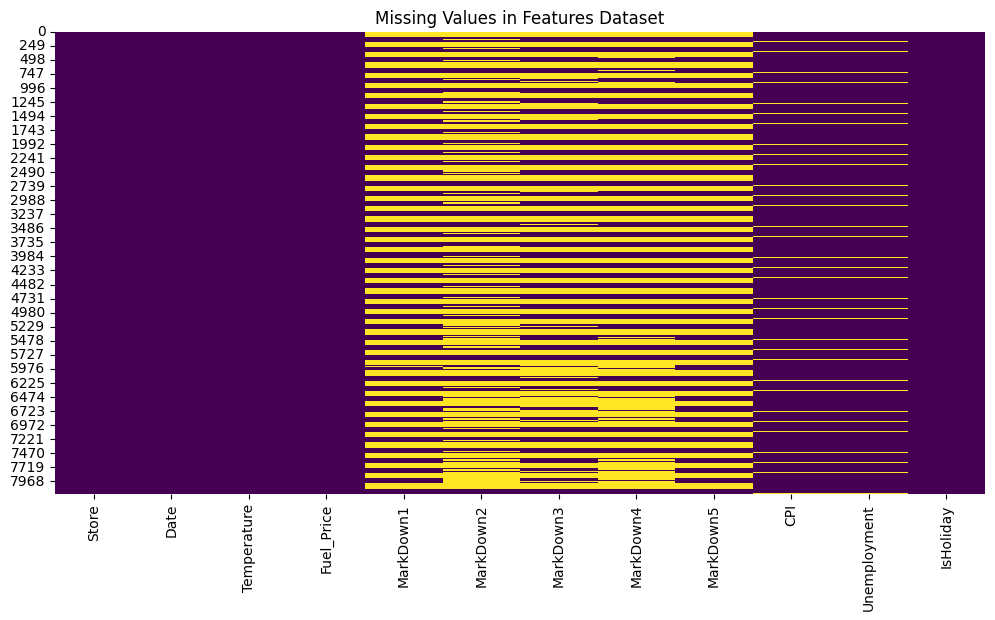

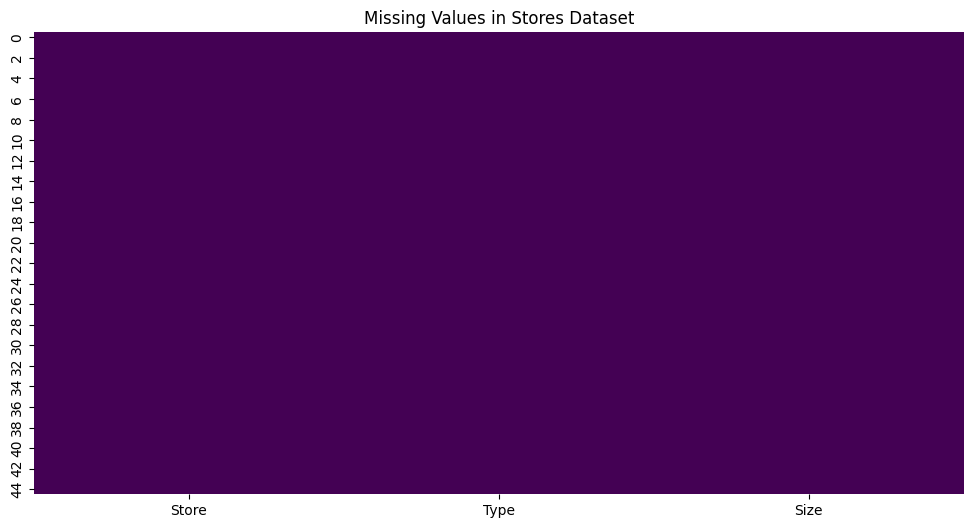

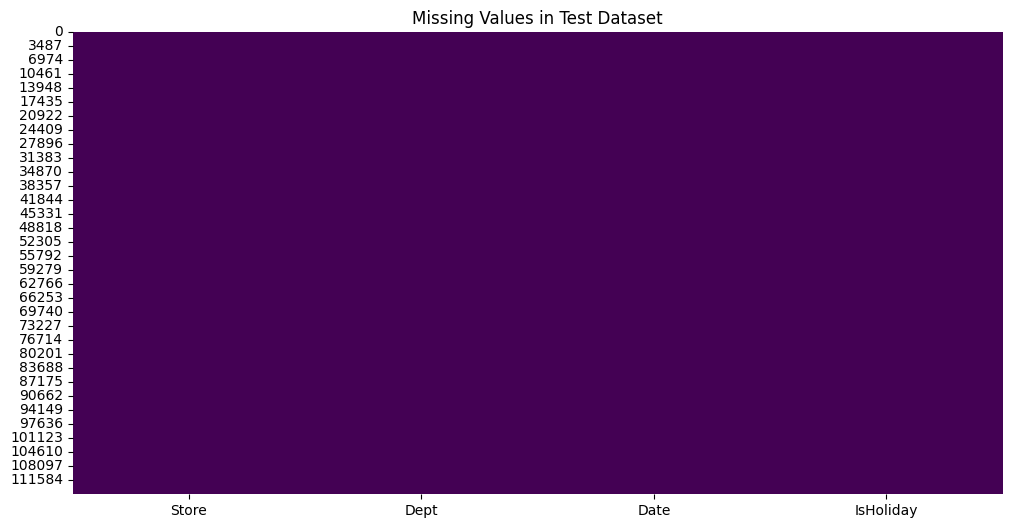

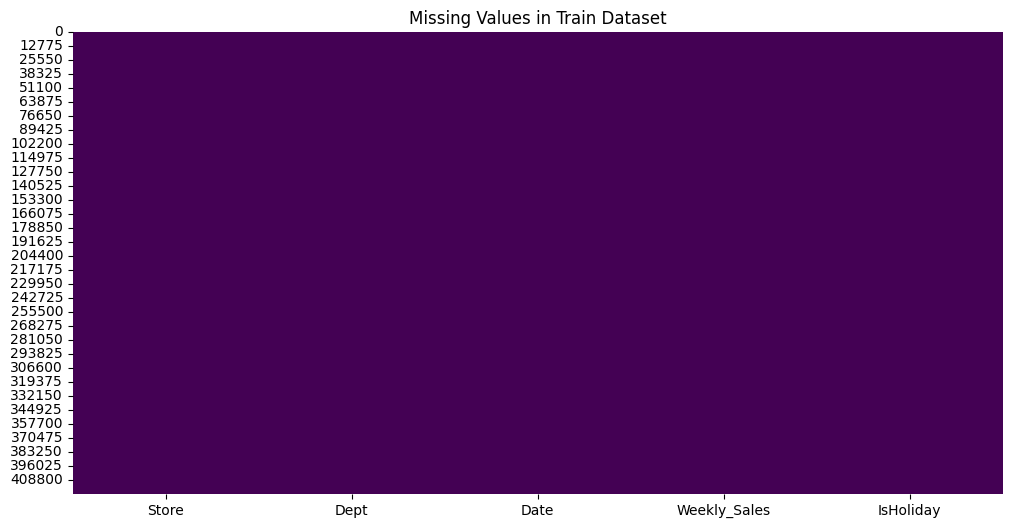

In [10]:
# Plot missing values in each dataset
plt.figure(figsize=(12, 6))
sns.heatmap(features.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Features Dataset')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(stores.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Stores Dataset')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(test.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Test Dataset')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in Train Dataset')
plt.show()

In [11]:
def clean_column_names(df):
    """Clean column names by converting to lowercase and replacing spaces with underscores."""
    df.columns = df.columns.str.lower().str.replace(' ', '_')
    return df

In [12]:
def convert_data_types(df):
    """Convert columns to appropriate data types."""
    # Convert 'date' column to datetime
    if 'date' in df.columns:
        df['date'] = pd.to_datetime(df['date'])

In [13]:
def convert_data_types(df):
  """Convert 'store' and 'dept' to categorical"""
  if 'store' in df.columns:
        df['store'] = df['store'].astype('category')
        if 'dept' in df.columns:
          df['dept'] = df['dept'].astype('category')
          return df

In [14]:
# Clean column names in all datasets
features = clean_column_names(features)
stores = clean_column_names(stores)
test = clean_column_names(test)
train = clean_column_names(train)

In [15]:
# Check column names in each dataset
print("Train Columns:", train.columns.tolist())
print("Features Columns:", features.columns.tolist())
print("Stores Columns:", stores.columns.tolist())
print("Test Columns:", test.columns.tolist())

Train Columns: ['store', 'dept', 'date', 'weekly_sales', 'isholiday']
Features Columns: ['store', 'date', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment', 'isholiday']
Stores Columns: ['store', 'type', 'size']
Test Columns: ['store', 'dept', 'date', 'isholiday']


In [17]:
# Merge Datasets

# Merge train and features
try:
    merged_data = pd.merge(train, features, on=['store', 'date'], how='left')
    print("Step 1: Merge train and features successful.")
    print(merged_data.head())
except Exception as e:
    print("Error in Step 1:")
    print(e)

# Merge with stores
try:
    merged_data = pd.merge(merged_data, stores, on=['store'], how='left')
    print("\nStep 2: Merge with stores successful.")
    print(merged_data.head())
except Exception as e:
    print("Error in Step 2:")
    print(e)

# Merge with test
try:
    merged_data = pd.merge(merged_data, test, on=['store', 'date', 'dept'], how='outer')
    print("\nStep 3: Merge with test successful.")
    print(merged_data.head())
except Exception as e:
    print("Error in Step 3:")
    print(e)

Step 1: Merge train and features successful.
   store  dept        date  weekly_sales  isholiday_x  temperature  \
0      1     1  2010-02-05      24924.50        False        42.31   
1      1     1  2010-02-12      46039.49         True        38.51   
2      1     1  2010-02-19      41595.55        False        39.93   
3      1     1  2010-02-26      19403.54        False        46.63   
4      1     1  2010-03-05      21827.90        False        46.50   

   fuel_price  markdown1  markdown2  markdown3  markdown4  markdown5  \
0       2.572        NaN        NaN        NaN        NaN        NaN   
1       2.548        NaN        NaN        NaN        NaN        NaN   
2       2.514        NaN        NaN        NaN        NaN        NaN   
3       2.561        NaN        NaN        NaN        NaN        NaN   
4       2.625        NaN        NaN        NaN        NaN        NaN   

          cpi  unemployment  isholiday_y  
0  211.096358         8.106        False  
1  211.242170  

In [18]:
# Print info for the train dataset
print("Train Dataset Info:")
print(train.info())
print("\nTrain Dataset Description:")
print(train.describe())
print("\nFirst 5 Rows of Train Dataset:")
print(train.head())

# Print info for the merged dataset
print("\nMerged Dataset Info:")
print(merged_data.info())
print("\nMerged Dataset Description:")
print(merged_data.describe())
print("\nFirst 5 Rows of Merged Dataset:")
print(merged_data.head())

Train Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   dept          421570 non-null  int64  
 2   date          421570 non-null  object 
 3   weekly_sales  421570 non-null  float64
 4   isholiday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None

Train Dataset Description:
               store           dept   weekly_sales
count  421570.000000  421570.000000  421570.000000
mean       22.200546      44.260317   15981.258123
std        12.785297      30.492054   22711.183519
min         1.000000       1.000000   -4988.940000
25%        11.000000      18.000000    2079.650000
50%        22.000000      37.000000    7612.030000
75%        33.000000      74.000000   20205.852500
max        45.000000      99.000000  693099.36000

###Key Observations

Duplicate isholiday Columns:

* isholiday_x: From the train dataset.

* isholiday_y: From the features dataset.

* isholiday: From the test dataset (appears to have missing values).

Missing Values:

* weekly_sales: Missing in the merged dataset (only 421,570 non-null values out of 536,634 rows). Keep rows with missing weekly_sales for better predictions.

* markdown1 to markdown5: High percentage of missing values.

* isholiday: Missing in the merged dataset (only 115,064 non-null values).

Data Types:

* isholiday_x and isholiday_y are of type object (likely strings or mixed types), while isholiday is also object.

In [19]:
# Check if isholiday_x and isholiday_y are identical
print("Are isholiday_x and isholiday_y identical?")
print((merged_data['isholiday_x'] == merged_data['isholiday_y']).all())


Are isholiday_x and isholiday_y identical?
False


In [20]:
# Find rows where isholiday_x and isholiday_y do not match
mismatch_rows = merged_data[merged_data['isholiday_x'] != merged_data['isholiday_y']]
print("Rows where isholiday_x and isholiday_y do not match:")
print(mismatch_rows[['store', 'dept', 'date', 'isholiday_x', 'isholiday_y']].head())

Rows where isholiday_x and isholiday_y do not match:
       store  dept        date isholiday_x isholiday_y
10244      1     1  2012-11-02         NaN         NaN
10245      1     2  2012-11-02         NaN         NaN
10246      1     3  2012-11-02         NaN         NaN
10247      1     4  2012-11-02         NaN         NaN
10248      1     5  2012-11-02         NaN         NaN


In [21]:
# Check rows where both isholiday_x and isholiday_y are missing
missing_holiday_rows = merged_data[merged_data['isholiday_x'].isna() & merged_data['isholiday_y'].isna()]
print("Rows where both isholiday_x and isholiday_y are missing:")
print(missing_holiday_rows[['store', 'dept', 'date', 'isholiday_x', 'isholiday_y']].head())

Rows where both isholiday_x and isholiday_y are missing:
       store  dept        date isholiday_x isholiday_y
10244      1     1  2012-11-02         NaN         NaN
10245      1     2  2012-11-02         NaN         NaN
10246      1     3  2012-11-02         NaN         NaN
10247      1     4  2012-11-02         NaN         NaN
10248      1     5  2012-11-02         NaN         NaN


In [22]:
# Check the dates where both isholiday_x and isholiday_y are missing
missing_dates = merged_data[merged_data['isholiday_x'].isna() & merged_data['isholiday_y'].isna()]['date'].unique()
print("Dates with missing holiday information:")
print(missing_dates)

Dates with missing holiday information:
['2012-11-02' '2012-11-09' '2012-11-16' '2012-11-23' '2012-11-30'
 '2012-12-07' '2012-12-14' '2012-12-21' '2012-12-28' '2013-01-04'
 '2013-01-11' '2013-01-18' '2013-01-25' '2013-02-01' '2013-02-08'
 '2013-02-15' '2013-02-22' '2013-03-01' '2013-03-08' '2013-03-15'
 '2013-03-22' '2013-03-29' '2013-04-05' '2013-04-12' '2013-04-19'
 '2013-04-26' '2013-05-03' '2013-05-10' '2013-05-17' '2013-05-24'
 '2013-05-31' '2013-06-07' '2013-06-14' '2013-06-21' '2013-06-28'
 '2013-07-05' '2013-07-12' '2013-07-19' '2013-07-26']


In [23]:
# List of known holidays in the missing date range
# Convert known_holidays to datetime64[ns]
known_holidays = pd.to_datetime([
    '2012-11-22',  # Thanksgiving
    '2012-12-25',  # Christmas Day
    '2013-01-01',  # New Year's Day
    '2013-07-04'   # Independence Day
])

# Convert isholiday_x and isholiday_y to boolean
merged_data['isholiday_x'] = merged_data['isholiday_x'].astype(bool)
merged_data['isholiday_y'] = merged_data['isholiday_y'].astype(bool)

# Fill missing values with False
merged_data['isholiday_x'] = merged_data['isholiday_x'].fillna(False)
merged_data['isholiday_y'] = merged_data['isholiday_y'].fillna(False)

In [24]:
# Combine isholiday_x and isholiday_y using logical OR
merged_data['isholiday'] = merged_data['isholiday_x'] | merged_data['isholiday_y']

# Drop the original isholiday_x and isholiday_y columns
merged_data.drop(columns=['isholiday_x', 'isholiday_y'], inplace=True)

# Convert isholiday to boolean
merged_data['isholiday'] = merged_data['isholiday'].astype(bool)

# Verify the changes
print("\nUpdated Columns in Merged Dataset:")
print(merged_data.columns.tolist())

print("\nMissing Values in isholiday Column:")
print(merged_data['isholiday'].isnull().sum())

print("\nFirst 5 Rows of isholiday Column:")
print(merged_data['isholiday'].head())


Updated Columns in Merged Dataset:
['store', 'dept', 'date', 'weekly_sales', 'temperature', 'fuel_price', 'markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'cpi', 'unemployment', 'type', 'size', 'isholiday']

Missing Values in isholiday Column:
0

First 5 Rows of isholiday Column:
0    False
1    False
2    False
3    False
4    False
Name: isholiday, dtype: bool


Data Cleaning
The dataset was cleaned to ensure consistency and usability. Key steps included:

Handling the isholiday Column: The isholiday column was converted to a boolean format (True/False) to ensure consistency.

Removing Duplicates: The dataset was checked for duplicate rows, and none were found, ensuring data integrity.

Handling Negative Sales Values: Negative values in the weekly_sales column (likely representing returns or data entry errors) were addressed by replacing them with the mean sales value.

In [25]:
# Handle Missing Values in markdown Columns

# Fill missing markdown values with 0
markdown_columns = ['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']
merged_data[markdown_columns] = merged_data[markdown_columns].fillna(0)

In [26]:
# Check the cleaned dataset
print("Merged Dataset Info:")
print(merged_data.info())

print("\nMissing Values in Merged Dataset:")
print(merged_data.isnull().sum())

print("\nFirst 5 Rows of Merged Dataset:")
print(merged_data.head())

Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536634 entries, 0 to 536633
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         536634 non-null  int64  
 1   dept          536634 non-null  int64  
 2   date          536634 non-null  object 
 3   weekly_sales  421570 non-null  float64
 4   temperature   421570 non-null  float64
 5   fuel_price    421570 non-null  float64
 6   markdown1     536634 non-null  float64
 7   markdown2     536634 non-null  float64
 8   markdown3     536634 non-null  float64
 9   markdown4     536634 non-null  float64
 10  markdown5     536634 non-null  float64
 11  cpi           421570 non-null  float64
 12  unemployment  421570 non-null  float64
 13  type          421570 non-null  object 
 14  size          421570 non-null  float64
 15  isholiday     536634 non-null  bool   
dtypes: bool(1), float64(11), int64(2), object(2)
memory usage: 61.9+ MB
Non

#### Handle Missing Values:
* weekly_sales (115,064 missing)

* temperature (115,064 missing)

* fuel_price (115,064 missing)

* cpi (115,064 missing)

* unemployment (115,064 missing)

* type (115,064 missing)

* size (115,064 missing)

In [27]:
# Handle isholiday column
def handle_isholiday(df):
    """
    Ensure the `isholiday` column is in the correct boolean format.
    """
    df['isholiday'] = df['isholiday'].astype(bool)
    return df

# Handle missing values
def handle_missing_values(df):
    """
    Handle missing values in the dataset.
    """
    # Impute numerical columns with the mean
    numerical_columns = ['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment', 'size']
    df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

    # Impute categorical columns with the mode
    categorical_columns = ['type']
    df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

    return df

# Apply the functions
merged_data = handle_isholiday(merged_data)
merged_data = handle_missing_values(merged_data)

# Verify that there are no missing values left
print("Missing Values After Imputation:")
print(merged_data.isnull().sum())

Missing Values After Imputation:
store           0
dept            0
date            0
weekly_sales    0
temperature     0
fuel_price      0
markdown1       0
markdown2       0
markdown3       0
markdown4       0
markdown5       0
cpi             0
unemployment    0
type            0
size            0
isholiday       0
dtype: int64


In [28]:
# Create the `weekly_sales_lag1` column
merged_data['weekly_sales_lag1'] = merged_data.groupby(['store', 'dept'])['weekly_sales'].shift(1)

# Fill missing values in `weekly_sales_lag1` with 0
merged_data['weekly_sales_lag1'] = merged_data['weekly_sales_lag1'].fillna(0)

# Verify that there are no missing values left
print("Missing Values After Filling:")
print(merged_data.isnull().sum())

Missing Values After Filling:
store                0
dept                 0
date                 0
weekly_sales         0
temperature          0
fuel_price           0
markdown1            0
markdown2            0
markdown3            0
markdown4            0
markdown5            0
cpi                  0
unemployment         0
type                 0
size                 0
isholiday            0
weekly_sales_lag1    0
dtype: int64


In [29]:
# Compute rolling averages for weekly_sales
merged_data['weekly_sales_rolling_avg'] = merged_data.groupby(['store', 'dept'])['weekly_sales'].transform(
    lambda x: x.rolling(window=4, min_periods=1).mean()
)

# Verify the new feature
print(merged_data[['store', 'dept', 'date', 'weekly_sales', 'weekly_sales_rolling_avg']].head())

   store  dept        date  weekly_sales  weekly_sales_rolling_avg
0      1     1  2010-02-05      24924.50                  24924.50
1      1     2  2010-02-05      50605.27                  50605.27
2      1     3  2010-02-05      13740.12                  13740.12
3      1     4  2010-02-05      39954.04                  39954.04
4      1     5  2010-02-05      32229.38                  32229.38


In [30]:
# Create total_markdown feature
merged_data['total_markdown'] = merged_data[['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']].sum(axis=1)

# Create num_markdowns feature
merged_data['num_markdowns'] = merged_data[['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5']].gt(0).sum(axis=1)

# Verify the new features
print(merged_data[['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5', 'total_markdown', 'num_markdowns']].head())

   markdown1  markdown2  markdown3  markdown4  markdown5  total_markdown  \
0        0.0        0.0        0.0        0.0        0.0             0.0   
1        0.0        0.0        0.0        0.0        0.0             0.0   
2        0.0        0.0        0.0        0.0        0.0             0.0   
3        0.0        0.0        0.0        0.0        0.0             0.0   
4        0.0        0.0        0.0        0.0        0.0             0.0   

   num_markdowns  
0              0  
1              0  
2              0  
3              0  
4              0  


### Handling Missing Data
Missing values were handled using simple and efficient imputation methods:

Numerical Columns: Missing values in numerical columns (weekly_sales, temperature, fuel_price, cpi, unemployment, size) were imputed with the mean.

Categorical Columns: Missing values in categorical columns (type) were imputed with the mode.

***Why Mean/Mode Imputation?***

Efficiency: Mean and mode imputation are computationally fast, which is important for large datasets like ours (536,634 rows).

Baseline Approach: These methods provide a reasonable baseline for handling missing values, especially when the missingness is random (Missing Completely at Random, MCAR).

Focus on Modeling: Since the goal is to establish a baseline model, mean/mode imputation allows us to quickly preprocess the data and focus on building and evaluating models.

Future Refinement: For time-series modeling (e.g., ARIMA, Prophet, LSTM), we can revisit imputation strategies (e.g., forward-filling) to better handle temporal dependencies.

### Feature Engineering
New features were created to enhance the predictive power of the dataset:

Time-Based Features: Extracted year, month, day, week, and day_of_week from the date column to capture temporal patterns.

Lagged Features: Created weekly_sales_lag1 to capture the sales value from the previous week.

Rolling Averages: Computed weekly_sales_rolling_avg to capture the average sales over a 4-week window.

Markdown Features: Created total_markdown (sum of all markdowns) and num_markdowns (number of active markdowns) to analyze the impact of promotions.

In [33]:
# Check for missing values (should be 0 after preprocessing)
print("\nMissing Values:")
print(merged_data.isnull().sum())


Missing Values:
store                       0
dept                        0
date                        0
weekly_sales                0
temperature                 0
fuel_price                  0
markdown1                   0
markdown2                   0
markdown3                   0
markdown4                   0
markdown5                   0
cpi                         0
unemployment                0
type                        0
size                        0
isholiday                   0
weekly_sales_lag1           0
weekly_sales_rolling_avg    0
total_markdown              0
num_markdowns               0
dtype: int64


In [35]:
# Save the cleaned dataset to a CSV file
file_path = '/content/drive/MyDrive/CIND 820 - Capstone Project/cleaned_walmart_data.csv'
merged_data.to_csv(file_path, index=False)

# Verify that the file was saved correctly
print("Dataset saved successfully!")

Dataset saved successfully!


In [36]:
# Reload the cleaned dataset
file_path = '/content/drive/MyDrive/CIND 820 - Capstone Project/cleaned_walmart_data.csv'
merged_data_reloaded = pd.read_csv(file_path)

# Check for missing values
print("Missing Values After Reloading:")
print(merged_data_reloaded.isnull().sum())

Missing Values After Reloading:
store                       0
dept                        0
date                        0
weekly_sales                0
temperature                 0
fuel_price                  0
markdown1                   0
markdown2                   0
markdown3                   0
markdown4                   0
markdown5                   0
cpi                         0
unemployment                0
type                        0
size                        0
isholiday                   0
weekly_sales_lag1           0
weekly_sales_rolling_avg    0
total_markdown              0
num_markdowns               0
dtype: int64


In [37]:
# Check if 'date' column exists in the original dataset
if 'date' in merged_data.columns:
    print("'date' column exists in the dataset.")
else:
    print("'date' column is missing in the dataset.")

'date' column exists in the dataset.


## **Exploratory Data Analysis (EDA) using YData Profiling**

In [32]:
# Generate YData Profiling Report for the merged_data DataFrame:

# Generate the profiling report
profile = ProfileReport(merged_data, title="Walmart Merged Dataset Profiling Report", explorative=True)

# Display the report in the notebook
profile.to_notebook_iframe()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Save the report to an HTML file
profile.to_file("Walmart_merged_dataset_report.html")

**KEY OBSERVATIONS**

#### 1. Temporal Patterns and Seasonality
**1.1 Strong Weekly and Seasonal Trends**

The dataset shows clear weekly and seasonal patterns in sales, with holidays (isholiday) having a significant impact. This is evident from the high correlation between weekly_sales and time-based features like year, month, and week. For example:

Holidays: Sales spike during holidays, as seen by the correlation between isholiday and weekly_sales (0.083). This makes sense because consumers tend to spend more during holiday seasons.

Weekly Patterns: The weekly_sales_lag1 and weekly_sales_rolling_avg features are highly correlated with weekly_sales (0.966 and 0.981, respectively), indicating that sales in one week are strongly influenced by the previous week and the rolling average.

What This Means for Modeling:

Use time-series models like ARIMA, Prophet, or LSTM to capture these temporal dependencies.

Include features like year, month, week, and isholiday to account for seasonality and holiday effects.

Leverage lagged features (weekly_sales_lag1) and rolling averages (weekly_sales_rolling_avg) to improve forecast accuracy.


**1.2 External Factors Influence Sales**

External variables like temperature, fuel_price, cpi, and unemployment also show correlations with weekly_sales. For example:

Temperature: There’s a slight negative correlation between temperature and weekly_sales (-0.024), suggesting that extreme weather conditions might reduce sales.

Fuel Price: The correlation between fuel_price and weekly_sales is minimal (-0.013), but it’s worth exploring further, as higher fuel prices could impact consumer spending.

Economic Indicators: cpi and unemployment show stronger correlations with weekly_sales (-0.030 and 0.002, respectively). Higher unemployment might reduce disposable income, while changes in cpi could reflect shifts in purchasing power.

What This Means for Modeling: Include external variables in your models to better understand how they influence sales. Use regression or causal inference techniques to quantify the impact of factors like temperature, fuel_price, and economic indicators on sales.


**1.3 Promotions and Markdowns**

The markdown1-5 columns, representing promotional discounts, are highly correlated with each other and with total_markdown and num_markdowns. For example:

Total Markdowns: The correlation between total_markdown and weekly_sales is -0.065, suggesting that promotions might not always lead to higher sales. This could be due to the timing or type of promotions.

Number of Markdowns: The correlation between num_markdowns and weekly_sales is -0.074, indicating that having more active promotions doesn’t necessarily boost sales.

What This Means for Modeling:

Treat markdown columns as binary features (active/inactive) or aggregate them into total_markdown and num_markdowns.

Analyze the impact of promotions on sales using regression or causal inference models to optimize pricing strategies.


**1.4 Store and Department Variability**

Sales vary significantly across stores and departments, as seen by the correlations between store, dept, and weekly_sales. For example:

Store Type: The correlation between type and weekly_sales is 0.053, indicating that store type (A, B, C) has a small but noticeable impact on sales.

Store Size: The correlation between size and weekly_sales is 0.258, suggesting that larger stores tend to have higher sales.

What This Means for Modeling:

Use store and dept as categorical features to account for variability across locations and product categories.

Consider clustering stores or departments based on sales patterns to develop targeted strategies for inventory management and marketing.


**1.5 Lagged and Rolling Features**

The engineered features weekly_sales_lag1 and weekly_sales_rolling_avg are highly correlated with weekly_sales (0.966 and 0.981, respectively). This indicates that:

Lagged Sales: Sales in one week are strongly influenced by the previous week’s sales.

Rolling Averages: The rolling average of sales captures trends and smooths out short-term fluctuations.

What This Means for Modeling:

Include lagged and rolling features in your models to capture temporal dependencies and trends.

These features will improve the accuracy of your forecasts, especially for time-series models.

---

#### 2. Promotions
The markdown1-5 columns, which represent promotional discounts, have many zeros (71.8% to 79.3%). This indicates that promotions are not always active, and their impact on sales may vary. To model this effectively, we will be treating markdowns as binary features (active/inactive) or combining them into a single feature like total_markdown. This will help analyze the impact of promotions on sales and optimize pricing strategies.


---
#### 3. Negative Sales
There are 1,285 negative values in the weekly_sales column (0.2% of the data). These likely represent returns or data entry errors, which can skew our model’s predictions. We will be keeping these and fixing them since they show the returns that were made which can help understand the product quality and purchase behaviour of consumer.


---

#### 4. Leverage Engineered Features
Features like weekly_sales_lag1 (lagged sales) and weekly_sales_rolling_avg (rolling average) are highly correlated with weekly_sales. These features capture trends and patterns in the data, such as how sales in one week influence the next. Including them in our models will help capture these dynamics and improve forecast accuracy, especially for time-series predictions.


---

#### 5. External Factors Influence Sales
Variables like temperature, fuel_price, cpi, and unemployment are correlated with sales. This makes sense because external factors like weather, economic conditions, and fuel prices can influence consumer spending. Including these variables in our models will help with better understanding on how external factors impact demand and improve the accuracy of future forecasts.


---

#### 6. Store and Department Differences
Sales vary significantly across stores and departments due to differences in location, customer demographics, and product categories. This means we should use store and dept as categorical features. Additionally, clustering stores or departments based on sales patterns can help develop targeted strategies for inventory management and marketing.


---

#### 7.  External Factors Influence Sales
External variables like temperature, fuel_price, cpi, and unemployment also show correlations with weekly_sales. For example:

Temperature: There’s a slight negative correlation between temperature and weekly_sales (-0.024), suggesting that extreme weather conditions might reduce sales.

Fuel Price: The correlation between fuel_price and weekly_sales is minimal (-0.013), but it’s worth exploring further, as higher fuel prices could impact consumer spending.

Economic Indicators: cpi and unemployment show stronger correlations with weekly_sales (-0.030 and 0.002, respectively). Higher unemployment might reduce disposable income, while changes in cpi could reflect shifts in purchasing power.

What This Means for Modeling:

Include external variables in your models to better understand how they influence sales.

Use regression or causal inference techniques to quantify the impact of factors like temperature, fuel_price, and economic indicators on sales.


---


